# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA




### PARTE A: Análisis Exploratorio de datos

- Preparación del dataset


In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set()
import plotly.graph_objects as go
import plotly.express as px

In [58]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

Vamos a unir los 3 datasets para trabajarlos juntos y eliminaremos las columnas que no se utilizaran:

In [59]:
dataset = pd.concat([data_2019, data_2018, data_2017])
dataset.drop(columns = ['hora_inicio'], inplace = True)
dataset.head()

,periodo,fecha,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [60]:
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')
dataset = dataset.set_index('fecha2')
dataset.drop(columns=['fecha','hora_fin'], inplace = True)
dataset.head()

,periodo,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
fecha2,,,,,,,
2019-01-01 01:00:00,2019,Martes,Alberti,Centro,Liviano,NO COBRADO,22
2019-01-01 01:00:00,2019,Martes,Alberti,Centro,Liviano,TELEPASE,6
2019-01-01 01:00:00,2019,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
2019-01-01 01:00:00,2019,Martes,Alberti,Provincia,Liviano,TELEPASE,18
2019-01-01 01:00:00,2019,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [61]:
dataset.reset_index()

,fecha2,periodo,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019-01-01 01:00:00,2019,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019-01-01 01:00:00,2019,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019-01-01 01:00:00,2019,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019-01-01 01:00:00,2019,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019-01-01 01:00:00,2019,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16
...,...,...,...,...,...,...,...,...
3560701,2017-12-31 23:00:00,2017,Domingo,Sarmiento,Provincia,Liviano,NO COBRADO,3
3560702,2017-12-31 23:00:00,2017,Domingo,Sarmiento,Provincia,Liviano,TELEPASE,10
3560703,2017-12-31 23:00:00,2017,Domingo,Sarmiento,Provincia,Pesado,TELEPASE,1
3560704,2017-12-31 00:00:00,2017,Domingo,Sarmiento,Provincia,Liviano,NO COBRADO,1


In [62]:
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

,periodo,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
fecha2,,,,,,,
2019-01-01 01:00:00,2019,Martes,Alberti,Centro,Liviano,NO COBRADO,22
2019-01-01 01:00:00,2019,Martes,Alberti,Centro,Liviano,TELEPASE,6
2019-01-01 01:00:00,2019,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
2019-01-01 01:00:00,2019,Martes,Alberti,Provincia,Liviano,TELEPASE,18
2019-01-01 01:00:00,2019,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [63]:
dataset['fecha']=dataset.index
dataset['hora'] = dataset['fecha'].dt.hour
dataset['dayofweek'] = dataset['fecha'].dt.dayofweek
dataset['trimestre'] = dataset['fecha'].dt.quarter
dataset['mes'] = dataset['fecha'].dt.month
dataset['año'] = dataset['fecha'].dt.year
dataset['dayofyear'] = dataset['fecha'].dt.dayofyear
dataset['dayofmonth'] = dataset['fecha'].dt.day
dataset['weekofyear'] = dataset['fecha'].dt.weekofyear

<ipython-input-63-b26345bfbb86>:9: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [64]:
print(dataset['estacion'].unique())


['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB' 'Alberdi' 'Dellepiane Centro' 'Dellepiane Liniers']


In [65]:
print(dataset['sentido'].unique())


['Centro' 'Provincia']


In [66]:
print(dataset['tipo_vehiculo'].unique())


['Liviano' 'Pesado']


In [67]:
print(dataset['forma_pago'].unique())


['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD' 'TARJETA DISCAPACIDAD' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

- Siguiendo la consigna, veremos el comportamiento de la Estación **Illia** y el medio de pago **efectivo**.

In [68]:
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset_illia = dataset[mask]
dataset_illia.drop(['dayofweek','trimestre','mes','año','dayofyear','dayofmonth','weekofyear'],axis=1,inplace=True)

dataset_illia.head()

C:\Users\Michael\miniconda3\envs\datascience\lib\site-packages\pandas\core\frame.py:4160: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,periodo,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha,hora
fecha2,,,,,,,,,
2019-01-01 02:00:00,2019,Martes,Illia,Centro,Liviano,EFECTIVO,537,2019-01-01 02:00:00,2
2019-01-01 02:00:00,2019,Martes,Illia,Centro,Pesado,EFECTIVO,1,2019-01-01 02:00:00,2
2019-01-01 02:00:00,2019,Martes,Illia,Provincia,Liviano,EFECTIVO,443,2019-01-01 02:00:00,2
2019-01-01 02:00:00,2019,Martes,Illia,Provincia,Pesado,EFECTIVO,1,2019-01-01 02:00:00,2
2019-01-01 03:00:00,2019,Martes,Illia,Centro,Liviano,EFECTIVO,769,2019-01-01 03:00:00,3


In [69]:
#Agrupamos los datos por año
anual = dataset_illia.resample('Y', on = 'fecha').sum()
anual.reset_index()
print("Cantidad de autos por año")
anual.head()

Cantidad de autos por año


,periodo,cantidad_pasos,hora
fecha,,,
2017-12-31,210231910,17783512,1249241
2018-12-31,201791928,15966944,1187903
2019-12-31,69944217,14115125,399344


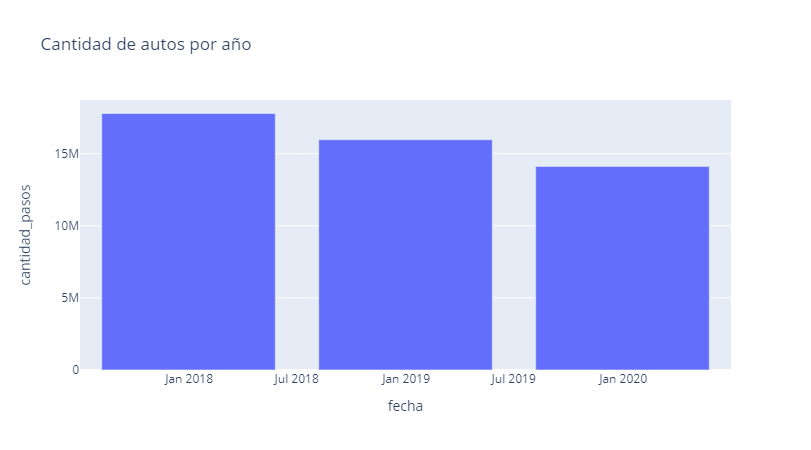

In [70]:
fig = px.bar (anual, y= "cantidad_pasos", title=" Cantidad de autos por año")
fig.show()

Como podemos observar, se nota una gran disminución de autos en el año 2019 que paguen con efectivo. Por este motivo, se analizará si aumentan los otros tipos de pago en este año.

In [71]:
mask =dataset.estacion=='Illia'
dataset = dataset[mask]

dataset.head()

,periodo,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha,hora,dayofweek,trimestre,mes,año,dayofyear,dayofmonth,weekofyear
fecha2,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,2019,Martes,Illia,Centro,Liviano,NO COBRADO,146,2019-01-01 01:00:00,1,1,1,1,2019,1,1,1
2019-01-01 01:00:00,2019,Martes,Illia,Centro,Liviano,TELEPASE,59,2019-01-01 01:00:00,1,1,1,1,2019,1,1,1
2019-01-01 01:00:00,2019,Martes,Illia,Centro,Pesado,TELEPASE,1,2019-01-01 01:00:00,1,1,1,1,2019,1,1,1
2019-01-01 01:00:00,2019,Martes,Illia,Provincia,Liviano,NO COBRADO,147,2019-01-01 01:00:00,1,1,1,1,2019,1,1,1
2019-01-01 01:00:00,2019,Martes,Illia,Provincia,Liviano,TELEPASE,106,2019-01-01 01:00:00,1,1,1,1,2019,1,1,1


In [72]:
forma_de_pago = dataset.groupby(by=["forma_pago","periodo"], as_index=False)["cantidad_pasos"].sum()
forma_de_pago =pd.DataFrame(forma_de_pago)
forma_de_pago


,forma_pago,periodo,cantidad_pasos
0,EFECTIVO,2017,17783512
1,EFECTIVO,2018,15966944
2,EFECTIVO,2019,14115125
3,EXENTO,2017,253009
4,EXENTO,2018,194309
5,EXENTO,2019,195205
6,INFRACCION,2017,71900
7,INFRACCION,2018,104002
8,INFRACCION,2019,164907
9,MONEDERO,2017,16


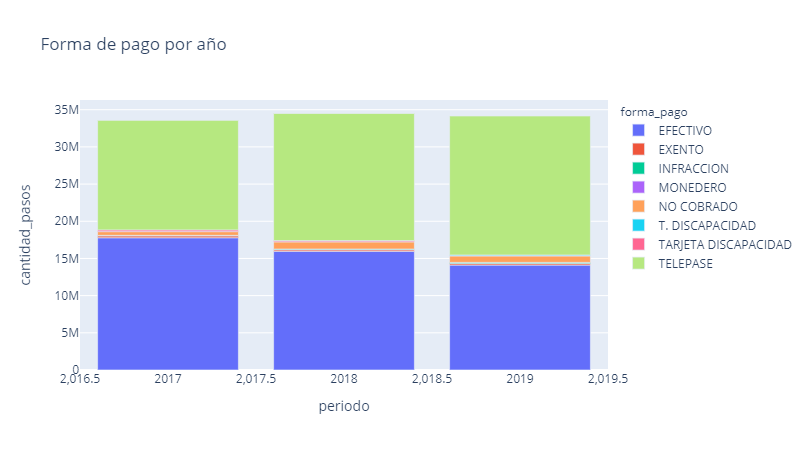

In [73]:
fig= px.bar ( forma_de_pago, x="periodo", y="cantidad_pasos", color="forma_pago", title= "Forma de pago por año")
fig.show()

Como podemos observar, la disminución de autos en 2019 con pago en efectivo se debe a una migración a otros medios de pago como telepase.

- Evaluaremos cómo es el comportamiento por hora en la estación:

In [74]:
horas_pico = dataset_illia .groupby(by=["hora", "dia"], as_index=False)["cantidad_pasos"].sum()
horas_pico=pd.DataFrame(horas_pico)
horas_pico


,hora,dia,cantidad_pasos
0,0,Domingo,175503
1,0,Jueves,143478
2,0,Lunes,120652
3,0,Martes,125842
4,0,Miércoles,135375
...,...,...,...
163,23,Lunes,174141
164,23,Martes,175728
165,23,Miércoles,186919
166,23,Sábado,222858


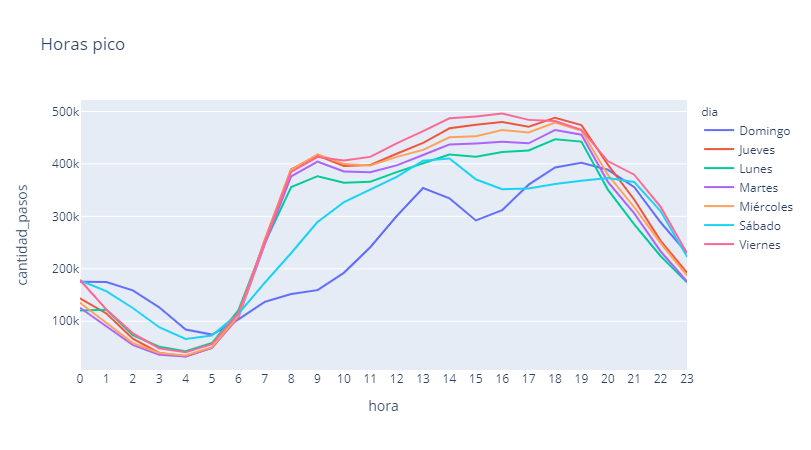

In [75]:
fig= px.line(horas_pico, x= "hora" , y="cantidad_pasos", title= "Horas pico",color="dia")
fig.update_xaxes(nticks=24,showgrid=False)
fig.show()

Como podemos observar, el viernes es el día con mayor tráfico en la estación Illia y el domingo el que menos movimiento de autos tiene.
Entre las 7 am y las 19 pm se registra el mayor movimiento de autos en los días de semana, que coincide con los días y horas laborales.

- Evaluaremos cómo es el comportamiento del sentido de circulación por hora  en la estación:

In [76]:
sentido = dataset_illia .groupby(by=["hora", "dia","sentido"], as_index=False)["cantidad_pasos"].sum()
sentido=pd.DataFrame(sentido)
sentido

,hora,dia,sentido,cantidad_pasos
0,0,Domingo,Centro,91070
1,0,Domingo,Provincia,84433
2,0,Jueves,Centro,67517
3,0,Jueves,Provincia,75961
4,0,Lunes,Centro,61302
...,...,...,...,...
331,23,Miércoles,Provincia,102425
332,23,Sábado,Centro,119347
333,23,Sábado,Provincia,103511
334,23,Viernes,Centro,112396


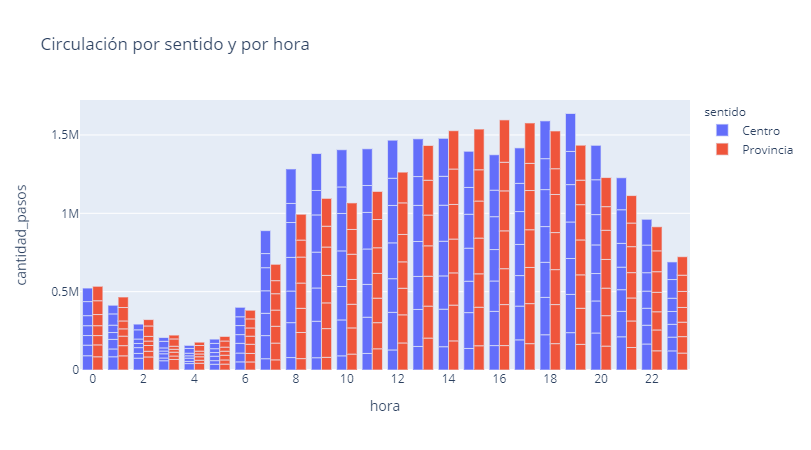

In [77]:
fig= px.bar ( sentido, x="hora", y="cantidad_pasos", color="sentido", barmode= "group", title= "Circulación por sentido y por hora")
fig.update_xaxes(nticks=24,showgrid=False)
fig.show()

Como podemos ver, en las primeras horas de la mañana aumenta la circulación hacia el centro mientras que en las últimas horas de la tarde, aumenta la circulación a provincia.

- Evaluaremos la cantidad de autos por día en cada año, para determinar si existen outliers :

In [78]:
#Agrupamos los datos por día
diario = dataset_illia.resample('D', on = 'fecha').sum()
diario.reset_index()
print("Cantidad de autos por día")
diario.head()

Cantidad de autos por día


,periodo,cantidad_pasos,hora
fecha,,,
2017-01-01,465927,31183,2976
2017-01-02,637372,51568,3713
2017-01-03,619219,51093,3573
2017-01-04,647457,53332,3909
2017-01-05,641406,56486,3820


In [79]:
ds_2017=diario.loc['2017-01-01':'2017-12-31']
ds_2018=diario.loc['2018-01-01':'2018-12-31']
ds_2019=diario.loc['2019-01-01':'2019-12-31']

In [80]:
print(f'Cantidad de registros por año:\n2017: {ds_2017.cantidad_pasos.sum()}\n2018: {ds_2018.cantidad_pasos.sum()}\n2019: {ds_2019.cantidad_pasos.sum()}')


Cantidad de registros por año:
2017: 17783512
2018: 15966944
2019: 14115125


In [81]:
feriados2017=['2017-01-01','2017-02-27','2017-02-28','2017-03-28','2017-04-02','2017-04-13','2017-04-14','2017-05-01','2017-06-17','2017-06-20','2017-07-09','2017-08-17','2017-10-12','2017-11-20','2017-12-08','2017-12-25']
feriados2018=['2018-01-01','2018-02-12','2018-02-13','2018-03-24','2018-03-30','2018-04-02','2018-04-30','2018-05-01','2018-05-25','2018-06-17','2018-06-20','2018-07-09','2018-08-20','2018-10-15','2018-11-19','2018-12-08','2018-12-24','2018-12-25','2018-12-31']
feriados2019=['2019-01-01','2019-03-04','2019-03-05','2019-03-24','2019-04-02','2019-04-18','2019-04-19','2019-05-01','2019-05-25','2019-06-17','2019-06-20','2019-07-08','2019-07-09','2019-08-17','2019-08-19','2019-10-12','2019-10-14','2019-11-18','2019-12-08','2019-12-25']

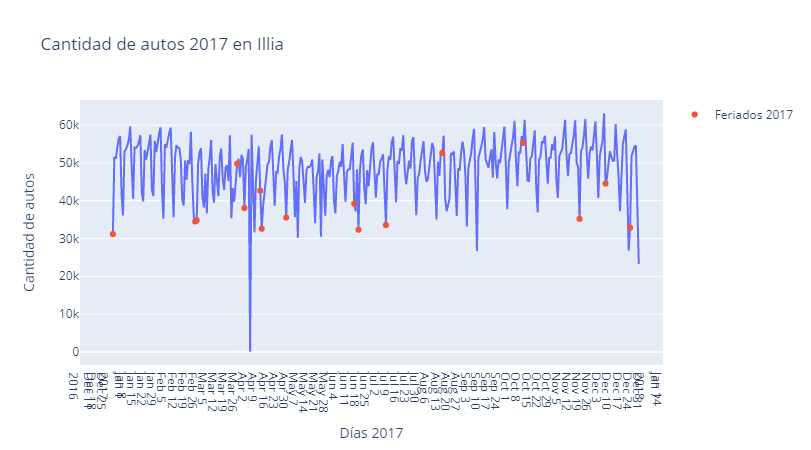

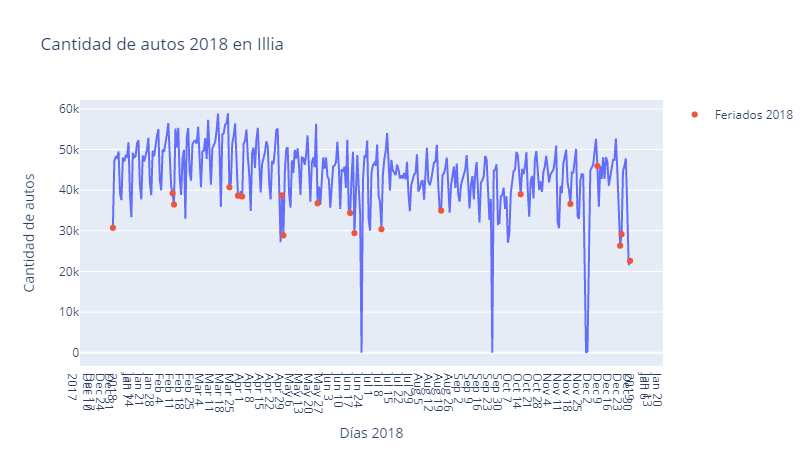

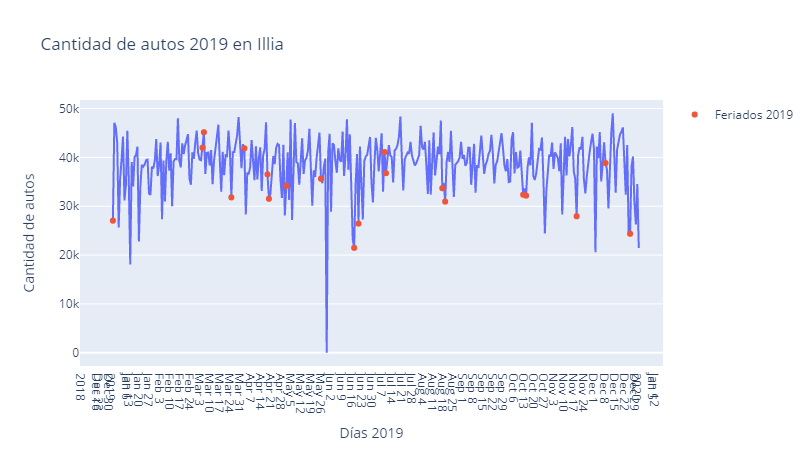

In [82]:
fig = px.line(ds_2017, x=ds_2017.index, y='cantidad_pasos',title='Cantidad de autos 2017 en Illia')
fig.add_trace(go.Scatter(x=feriados2017, y=ds_2017.loc[feriados2017].cantidad_pasos,
                    mode='markers', name='Feriados 2017'))
fig.update_layout(xaxis_title='Días 2017',
                   yaxis_title='Cantidad de autos')
fig.update_xaxes(nticks=100,showgrid=False)
fig.show()
fig2 = px.line(ds_2018, x=ds_2018.index, y='cantidad_pasos',title='Cantidad de autos 2018 en Illia')
fig2.add_trace(go.Scatter(x=feriados2018, y=ds_2018.loc[feriados2018].cantidad_pasos,
                    mode='markers', name='Feriados 2018'))
fig2.update_layout(xaxis_title='Días 2018',
                   yaxis_title='Cantidad de autos')
fig2.update_xaxes(nticks=100,showgrid=False)
fig2.show()
fig3 = px.line(ds_2019, x=ds_2019.index, y='cantidad_pasos',title='Cantidad de autos 2019 en Illia')
fig3.add_trace(go.Scatter(x=feriados2019, y=ds_2019.loc[feriados2019].cantidad_pasos,
                    mode='markers', name='Feriados 2019'))
fig3.update_layout(xaxis_title='Días 2019',
                   yaxis_title='Cantidad de autos')
fig3.update_xaxes(nticks=100,showgrid=False)
fig3.show()

Como podemos ver, muchos de los días con menor circulación son feriados nacionales (puntos rojos). Evaluaremos los outliers según los gráficos observados para encontrar algún motivo de la baja en la circulación de los días que no son feriados.

1) Outliers 2017:

Según lo observado en el gráfico, filtraremos los días que tengan menos de 28.000 autos.

In [83]:
mask = ds_2017.cantidad_pasos<=28000
outliers_2017 = ds_2017[mask]
outliers_2017


,periodo,cantidad_pasos,hora
fecha,,,
2017-04-06,6051,40,3
2017-09-10,419536,26684,2663
2017-12-24,413485,26805,2277
2017-12-31,403400,23229,2277


Estos Outliers pueden deberse a:
- 06/04/2017: Paro nacional.
- 10/09/2017: Domingo.
- 24/12/2017 y 31/12/2019: Navidad y Año Nuevo respectivamente.


2) Outliers 2018:

Según lo observado en el gráfico, filtraremos los días que tengan menos de 27.000 autos.

In [84]:
mask = ds_2018.cantidad_pasos<=27000
outliers_2018 = ds_2018[mask]
outliers_2018


,periodo,cantidad_pasos,hora
fecha,,,
2018-06-25,0,0,0
2018-09-25,0,0,0
2018-11-29,387456,19728,1870
2018-11-30,0,0,0
2018-12-01,22198,350,92
2018-12-24,405618,26332,2265
2018-12-30,312790,21559,2102
2018-12-31,399564,22599,2213


Estos Outliers pueden deberse a:
- 25/06/2018: Paro nacional.
- 25/09/2018: Paro nacional.
- 29/11/2018: Comienza el G20 en Argentina.
- 30/11/2018 y 01/11/2018: Feriado en CABA por la Cumbre de Líderes del Grupo de los 20.
- 24/12/2018, 30/12/2018 y 31/12/2018: Navidad y Año Nuevo respectivamente.


3) Outliers 2019:

Según lo observado en el gráfico, filtraremos los días que tengan menos de 23.000 autos.

In [85]:
mask = ds_2019.cantidad_pasos<=23000
outliers_2019 = ds_2019[mask]
outliers_2019


,periodo,cantidad_pasos,hora
fecha,,,
2019-01-13,121140,18076,781
2019-01-19,151425,22774,794
2019-05-29,0,0,0
2019-06-17,191805,21469,1099
2019-12-01,129216,20553,624
2019-12-31,179691,21447,1034


Estos Outliers pueden deberse a:
- 13/01/2019: Domingo.
- 29/05/2019: Paro nacional.
- 17/06/2019: Feriado nacional.
- 01/12/2019: Domingo.
- 31/12/2019: Año Nuevo.



### Parte B: Componentes de la serie

Continuaremos trabajando con la estación Illia pero con todos los medios de pago, ya que como observamos, en 2019 disminuye el pago en efectivo.


In [86]:
mask =dataset.estacion=='Illia'
ds_illia = dataset[mask]

ds_illia.head()

,periodo,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha,hora,dayofweek,trimestre,mes,año,dayofyear,dayofmonth,weekofyear
fecha2,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,2019,Martes,Illia,Centro,Liviano,NO COBRADO,146,2019-01-01 01:00:00,1,1,1,1,2019,1,1,1
2019-01-01 01:00:00,2019,Martes,Illia,Centro,Liviano,TELEPASE,59,2019-01-01 01:00:00,1,1,1,1,2019,1,1,1
2019-01-01 01:00:00,2019,Martes,Illia,Centro,Pesado,TELEPASE,1,2019-01-01 01:00:00,1,1,1,1,2019,1,1,1
2019-01-01 01:00:00,2019,Martes,Illia,Provincia,Liviano,NO COBRADO,147,2019-01-01 01:00:00,1,1,1,1,2019,1,1,1
2019-01-01 01:00:00,2019,Martes,Illia,Provincia,Liviano,TELEPASE,106,2019-01-01 01:00:00,1,1,1,1,2019,1,1,1


In [87]:
ds_illia['fecha2']=ds_illia.index
ds_illia['hora'] = ds_illia['fecha2'].dt.hour
ds_illia['dayofweek'] = ds_illia['fecha2'].dt.dayofweek
ds_illia['trimestre'] = ds_illia['fecha2'].dt.quarter
ds_illia['mes'] = ds_illia['fecha2'].dt.month
ds_illia['año'] = ds_illia['fecha2'].dt.year
ds_illia['dayofyear'] = ds_illia['fecha2'].dt.dayofyear
ds_illia['dayofmonth'] = ds_illia['fecha2'].dt.day
ds_illia['weekofyear'] = ds_illia['fecha2'].dt.weekofyear


<ipython-input-87-32b26b7aa902>:9: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [88]:
ds_illia.drop(['dayofweek','trimestre','año','dayofyear','dayofmonth','weekofyear'],axis=1,inplace=True)
ds_illia.head()

,periodo,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha,hora,mes,fecha2
fecha2,,,,,,,,,,,
2019-01-01 01:00:00,2019,Martes,Illia,Centro,Liviano,NO COBRADO,146,2019-01-01 01:00:00,1,1,2019-01-01 01:00:00
2019-01-01 01:00:00,2019,Martes,Illia,Centro,Liviano,TELEPASE,59,2019-01-01 01:00:00,1,1,2019-01-01 01:00:00
2019-01-01 01:00:00,2019,Martes,Illia,Centro,Pesado,TELEPASE,1,2019-01-01 01:00:00,1,1,2019-01-01 01:00:00
2019-01-01 01:00:00,2019,Martes,Illia,Provincia,Liviano,NO COBRADO,147,2019-01-01 01:00:00,1,1,2019-01-01 01:00:00
2019-01-01 01:00:00,2019,Martes,Illia,Provincia,Liviano,TELEPASE,106,2019-01-01 01:00:00,1,1,2019-01-01 01:00:00


- **Tendencia de la serie**


In [89]:
#Resampleamos nuestros datos para agrupar por semana
sem_illia = ds_illia.resample('w', on = 'fecha2').sum()
sem_illia.drop(['periodo','hora','mes'],axis=1,inplace=True)
print(sem_illia.shape)
sem_illia.head()

(158, 1)


,cantidad_pasos
fecha2,
2017-01-01,45478
2017-01-08,585700
2017-01-15,613675
2017-01-22,599307
2017-01-29,598163


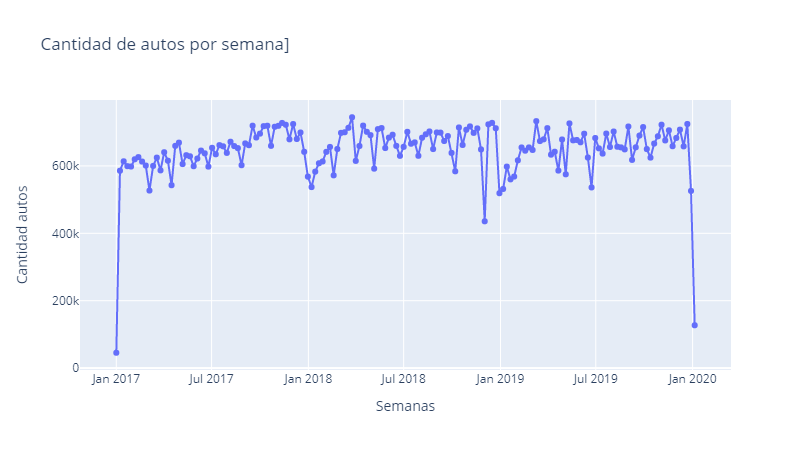

In [90]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=sem_illia.index, y=sem_illia['cantidad_pasos'], mode='lines+markers'))
fig.update_layout(title='Cantidad de autos por semana]',
                   xaxis_title='Semanas',
                   yaxis_title='Cantidad autos')

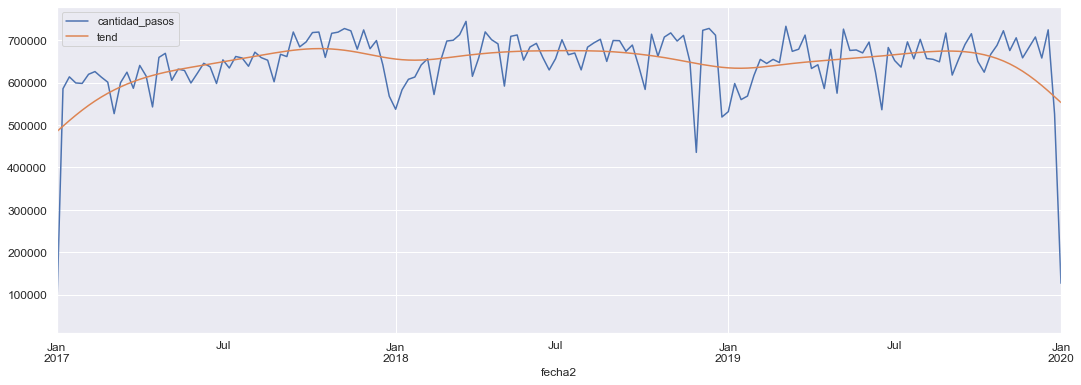

In [91]:
import statsmodels.api as sm
ciclo, tend = sm.tsa.filters.hpfilter(sem_illia['cantidad_pasos'])
sem_illia['tend'] = tend
sem_illia[['cantidad_pasos', 'tend']].plot(figsize=(18, 6), fontsize=12)

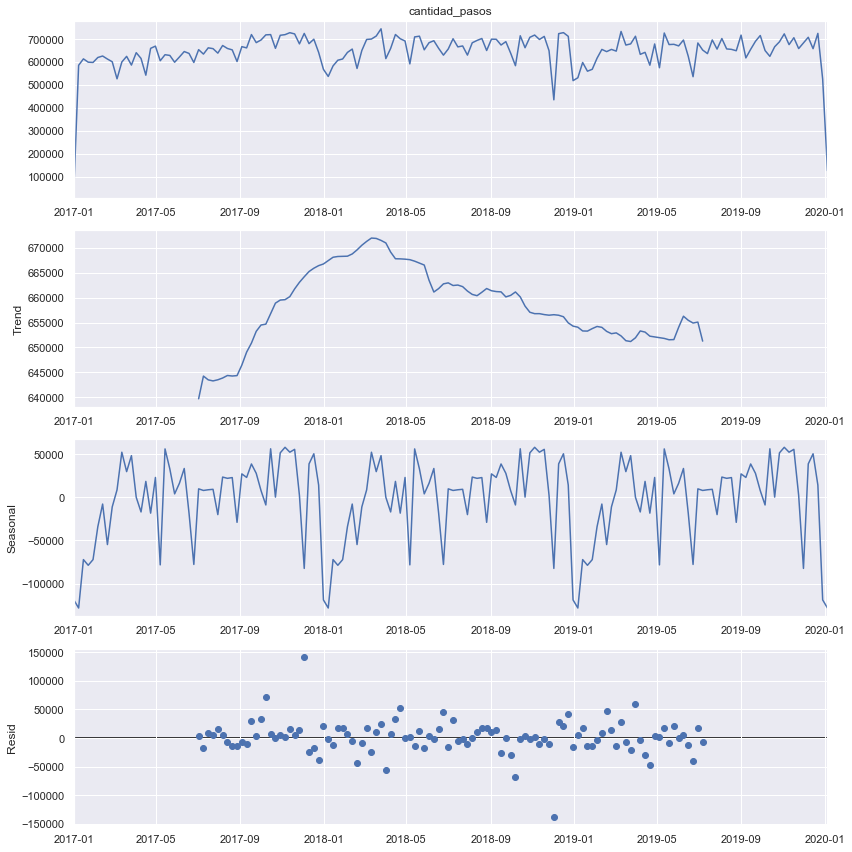

In [92]:
from statsmodels.tsa.seasonal import seasonal_decompose
res_sem = seasonal_decompose(sem_illia.cantidad_pasos, model='additive')
plt.rcParams['figure.figsize'] = [12,12]
res_sem.plot()
plt.show()

In [93]:
#Resampleamos nuestros datos para agrupar por mes
mes_illia = ds_illia.resample('m', on = 'fecha2').sum()
mes_illia.drop(['periodo','hora','mes'],axis=1,inplace=True)
print(mes_illia.shape)
mes_illia.head()

(36, 1)


,cantidad_pasos
fecha2,
2017-01-31,2639365
2017-02-28,2364688
2017-03-31,2734740
2017-04-30,2629246
2017-05-31,2756833


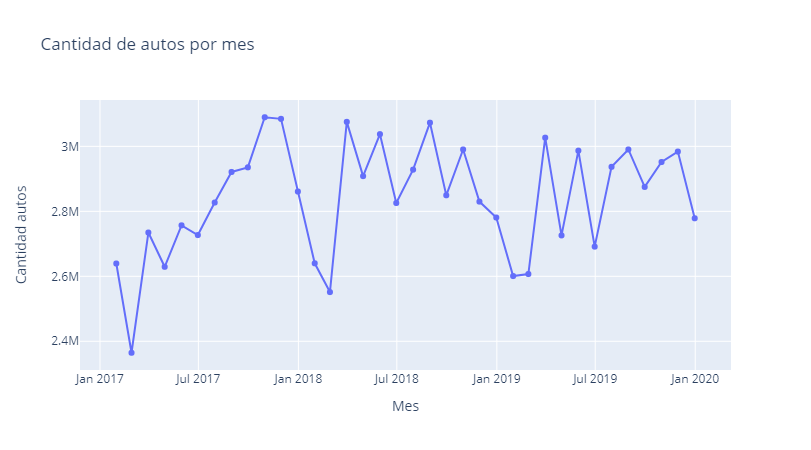

In [94]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=mes_illia.index, y=mes_illia['cantidad_pasos'], mode='lines+markers'))
fig.update_layout(title='Cantidad de autos por mes',
                   xaxis_title='Mes',
                   yaxis_title='Cantidad autos')

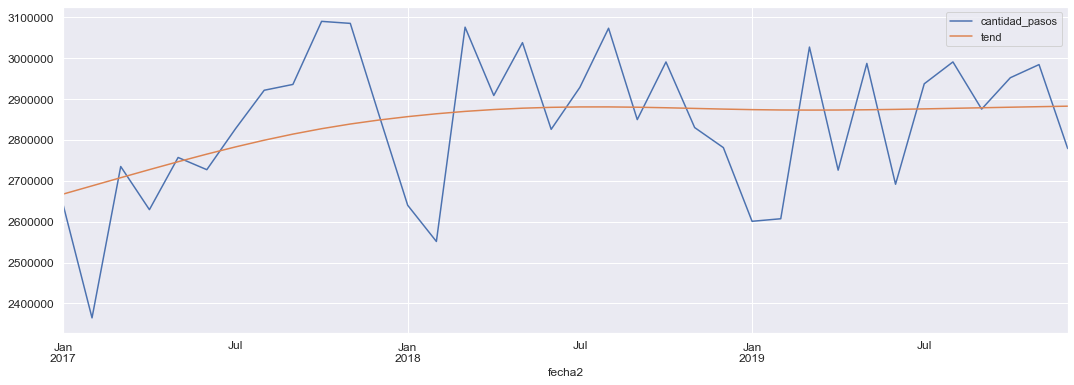

In [95]:
import statsmodels.api as sm
ciclo, tend = sm.tsa.filters.hpfilter(mes_illia['cantidad_pasos'])
mes_illia['tend'] = tend
mes_illia[['cantidad_pasos', 'tend']].plot(figsize=(18, 6), fontsize=12)

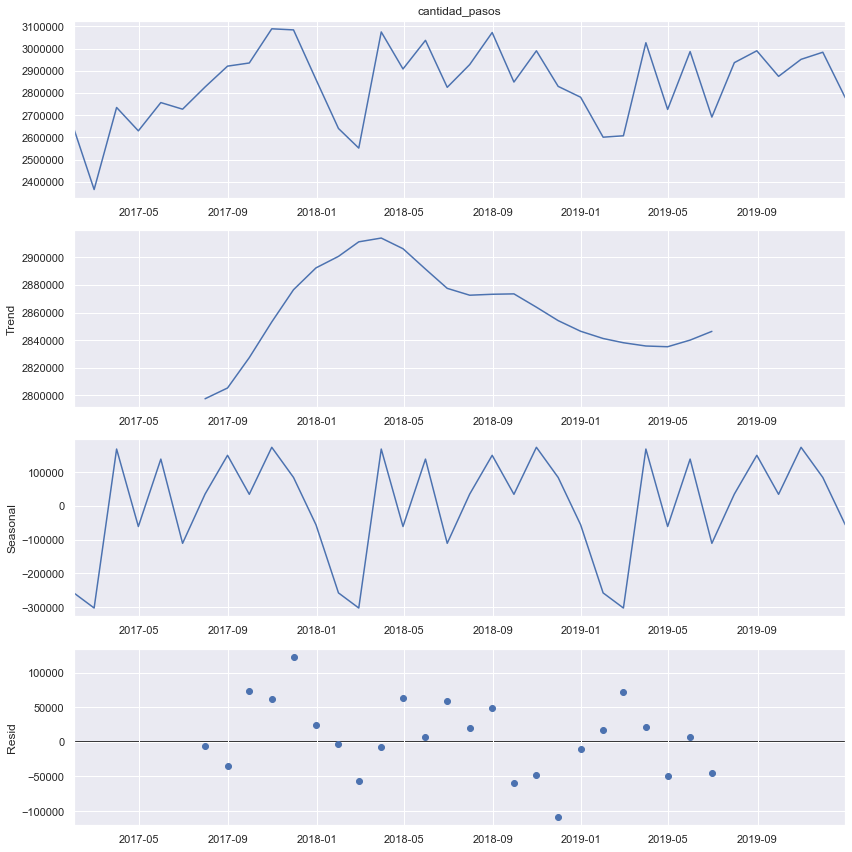

In [96]:
res_mensual = seasonal_decompose(mes_illia.cantidad_pasos, model='additive')
plt.rcParams['figure.figsize'] = [12,12]
res_mensual.plot()
plt.show()

- Como podemos observar:
    * Semanalmente los días sábados y domingos el tráfico disminuye.
    * Mensualmente, se ve una baja de tráfico en los meses de verano, que puede estar asociado a las vacaciones.


- **Autocorrelación de la serie**


In [97]:
#Resampleamos nuestros datos para agrupar por dia
dia_illia = ds_illia.resample('d', on = 'fecha2').sum()
dia_illia .drop(['periodo','hora','mes'],axis=1,inplace=True)

dia_illia.head()

,cantidad_pasos
fecha2,
2017-01-01,45478
2017-01-02,89289
2017-01-03,92602
2017-01-04,95813
2017-01-05,100044


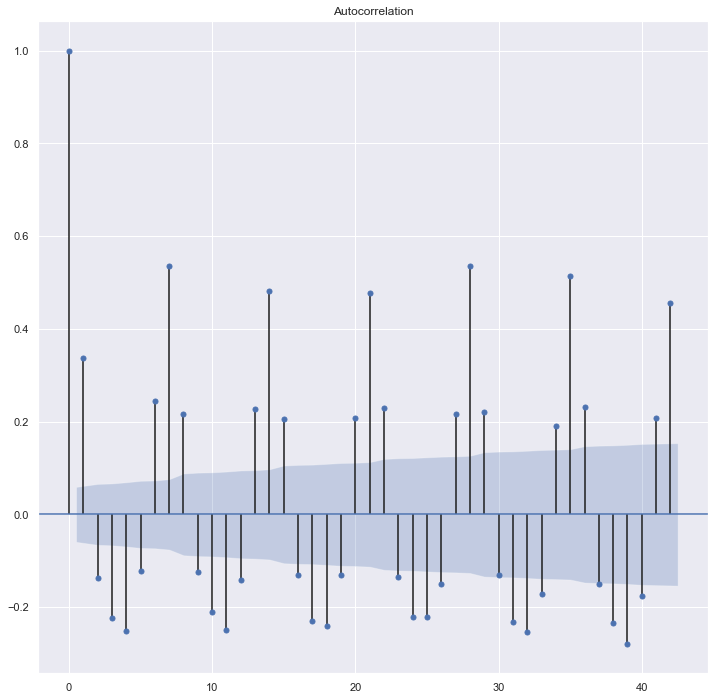

In [98]:
from statsmodels.graphics.tsaplots import plot_acf


plot_acf(dia_illia.cantidad_pasos, lags = 42)
plt.show()

Podemos ver que hay una correlación de la cantidad de autos cada 7 días. Esto quiere decir que la variable no es independiente del tiempo, sino que depende de valores anteriores.

- **Estacionariedad de la serie**

Aplicaremos el rest Dickey Fuller para evaluar si la serie es o no estacionaria. En esta prueba se evalúa la hipótesis nula que confirma que existe una raíz unitaria en la serie temporal. El test devuelve un número decimal y cuanto más negativo es este valor, mayor es la probabilidad de rechazar la hipótesis nula, confirmando que en la serie temporal no hay raíces unitarias, es decir, que nos encontramos ante una serie estacionaria con un cierto grado de probabilidad


In [99]:
from statsmodels.tsa.stattools import adfuller

print("Resultados del Test Dickey-Fuller:")
dftest= adfuller (dia_illia["cantidad_pasos"], autolag ="AIC" )

df= pd.Series (dftest[0:4], index = ["Test Statistic", "p-value", "# Lags Used", "Observations Used"])
for key,value in dftest[4].items():
    df["Critical Value (%s)" %key ] = value

print(df)


Resultados del Test Dickey-Fuller:
Test Statistic            -4.902733
p-value                    0.000034
# Lags Used               22.000000
Observations Used       1072.000000
Critical Value (1%)       -3.436465
Critical Value (5%)       -2.864240
Critical Value (10%)      -2.568208
dtype: float64


El valor del Test Statistic de -4,9. Esto quiere decir que debemos rechazar la hipótesis nula: **tenemos un conjunto de datos estacionario.**

En los valores críticos, obtuvimos un valor de -3.436 al 1%. Esto sugiere que podemos rechazar la hipótesis nula con un nivel de significancia de menos del 1% (es decir, una probabilidad baja de que el resultado sea una casualidad estadística).


###  Parte C: Predicción a Futuro

* Modelo Benchmark

In [100]:
dia_illia['shift_7']=dia_illia.cantidad_pasos.shift(periods=7)
dia_illia['shift_7']

fecha2
2017-01-01         NaN
2017-01-02         NaN
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
                ...   
2019-12-27    117027.0
2019-12-28     79741.0
2019-12-29     64364.0
2019-12-30    106376.0
2019-12-31     52954.0
Freq: D, Name: shift_7, Length: 1095, dtype: float64

In [101]:
split_date = '2019-10-01'
test = dia_illia.loc[dia_illia.index >= split_date].copy()

In [102]:
ybench=test.cantidad_pasos
ypredbench=dia_illia.loc['2019-10-01':'2019-12-31'].shift_7

In [103]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rmsebench = np.sqrt(mean_squared_error(ybench, ypredbench))
print(f'RMSE del Modelo Benchmark: {np.round(rmsebench,3)}')

RMSE del Modelo Benchmark: 26938.868


* Predicción del último semestre de 2019

Para predecir el último semestre del 2019, utilizaremos la librería Prophet

In [104]:
from fbprophet import Prophet

In [105]:
dia_illia.reset_index(inplace=True)

dia_illia.rename(columns={'fecha2':'ds','cantidad_pasos':'y'}, inplace=True)

dia_illia_train = dia_illia[dia_illia.ds <= '2019-09-30']
dia_illia_test = dia_illia[dia_illia.ds > '2019-09-30']

model = Prophet(daily_seasonality=True)
model.fit(dia_illia_train)

ultimo_trimestre = dia_illia_test[['ds']]
ultimo_trimestre_pred = model.predict(ultimo_trimestre)

rmse_prophet = np.sqrt(mean_squared_error(dia_illia_test.y, ultimo_trimestre_pred.yhat))


In [106]:
print(f'RMSE del Modelo con Prophet es: {np.round(rmse_prophet,3)}')

RMSE del Modelo con Prophet es: 19301.156


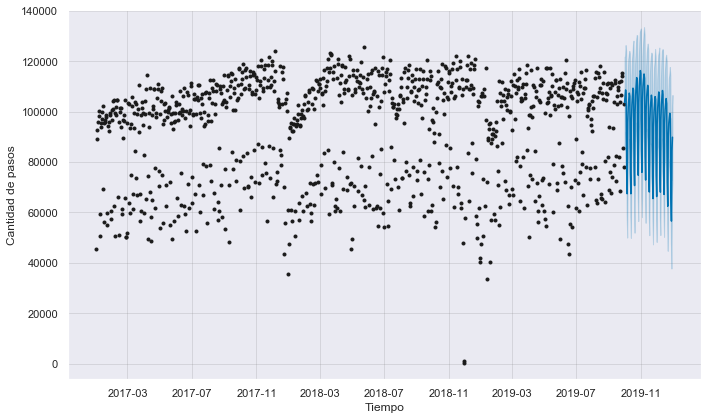

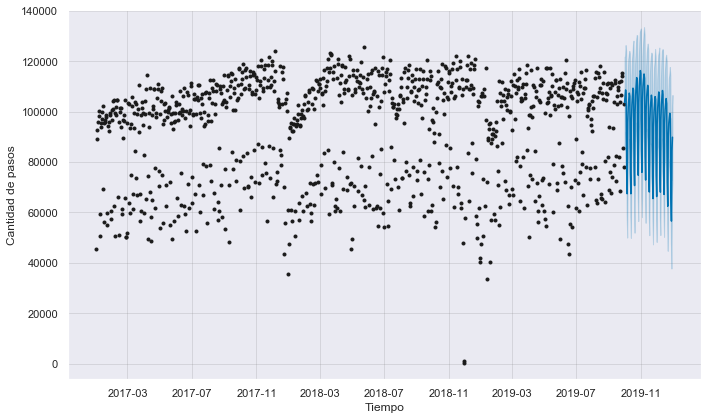

In [107]:
model.plot(ultimo_trimestre_pred,xlabel='Tiempo',
                             ylabel='Cantidad de pasos')

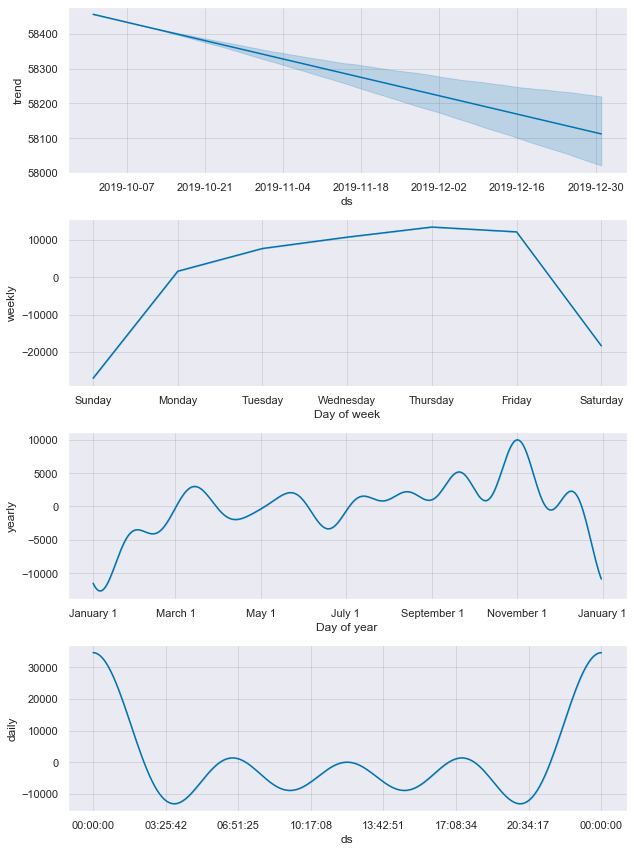

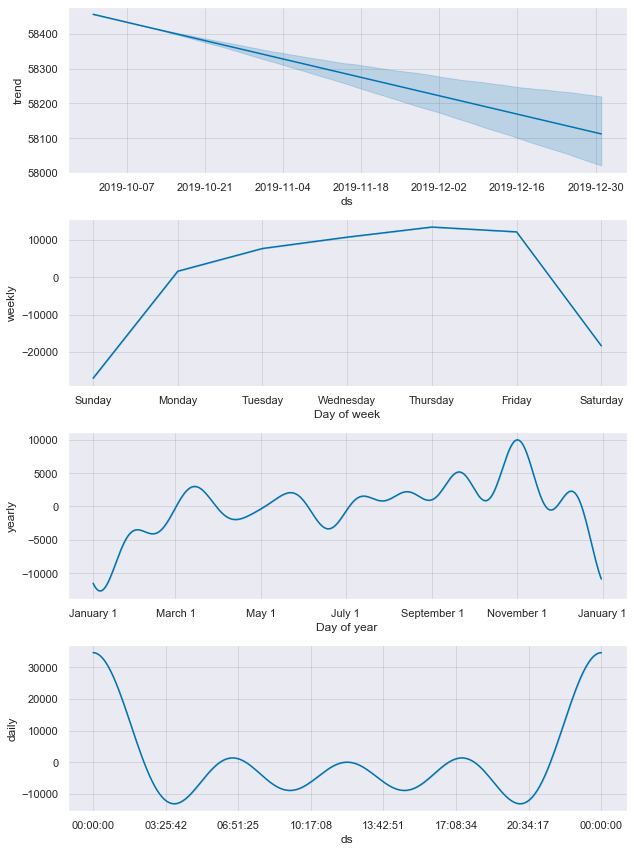

In [108]:
model.plot_components(ultimo_trimestre_pred)

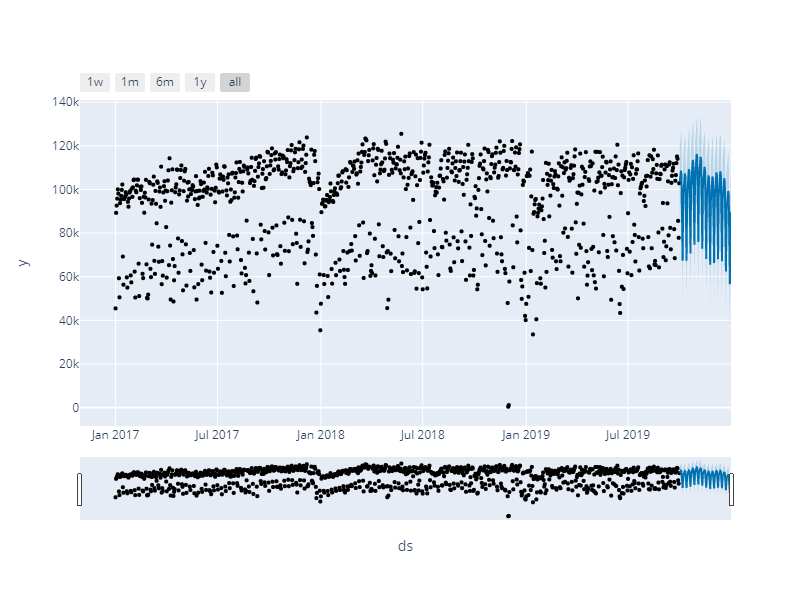

In [109]:
from fbprophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model, ultimo_trimestre_pred)

Podemos observar que el RMSE del modelo con Prophet es menor al del modelo Benchmark, por lo que predice mejor. Además, se puede ver la tendencia de baja de cantidad de autos los fines de semana y los meses de verano. Así como también la disminución de autos que pasan por la estación Illia en 2019.

#### -Cross Validation con Prophet:

In [110]:
from fbprophet.diagnostics import cross_validation
ultimo_trimestre_cv = cross_validation(model,initial='366 days',period='365 days', horizon='92days')

INFO:fbprophet:Making 2 forecasts with cutoffs between 2018-06-30 00:00:00 and 2019-06-30 00:00:00


In [111]:
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

ultimo_trimestre_p = performance_metrics(ultimo_trimestre_cv)
ultimo_trimestre_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,9 days,3.446293e+08,18564.193799,12652.438572,0.166521,0.064626,0.777778
1,10 days,3.355486e+08,18317.985526,11800.834961,0.152081,0.051436,0.777778
2,11 days,3.350670e+08,18304.835116,11675.931287,0.150563,0.051436,0.777778
3,12 days,3.621579e+08,19030.447917,12499.783369,0.161649,0.059584,0.722222
4,13 days,2.950599e+08,17177.308711,10903.274458,0.138028,0.055739,0.777778
...,...,...,...,...,...,...,...
79,88 days,1.417526e+08,11905.989247,8053.539707,0.093406,0.049520,0.777778
80,89 days,1.416625e+08,11902.206837,8218.111440,0.094534,0.049062,0.777778
81,90 days,1.441271e+08,12005.292847,8535.530926,0.098635,0.050879,0.777778
82,91 days,1.908298e+08,13814.116992,10469.889320,0.129691,0.061818,0.722222


In [112]:
rmse_prophet_cv= (ultimo_trimestre_p.iloc[83,2])

In [113]:
print(f'RMSE para un horizonte de 92 días: {rmse_prophet_cv}')

RMSE para un horizonte de 92 días: 14064.567281969625


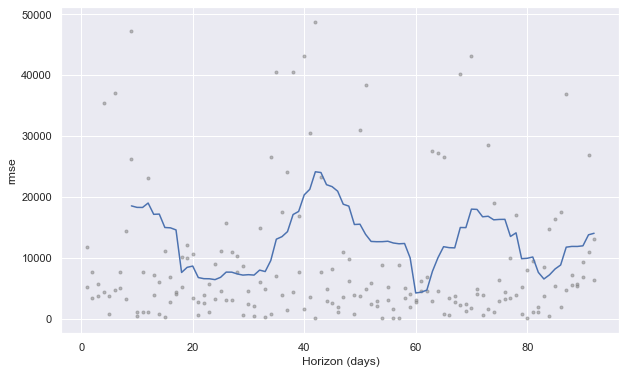

In [114]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(ultimo_trimestre_cv , metric='rmse')

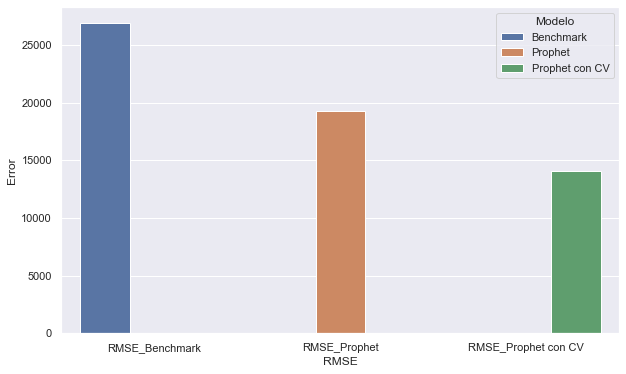

In [115]:
evaluacion_modelos = pd.DataFrame({ 'RMSE': ['RMSE_Benchmark','RMSE_Prophet','RMSE_Prophet con CV'],
                'Modelo' : ['Benchmark' ,'Prophet' , 'Prophet con CV'],
                  'Error' : [rmsebench,rmse_prophet, rmse_prophet_cv]
             })



plt.figure(figsize = (10,6))
sns.barplot (data= evaluacion_modelos , x= 'RMSE', y ='Error', hue= 'Modelo')

In [116]:
evaluacion_modelos

,RMSE,Modelo,Error
0,RMSE_Benchmark,Benchmark,26938.867501
1,RMSE_Prophet,Prophet,19301.156227
2,RMSE_Prophet con CV,Prophet con CV,14064.567282


**Como podemos observar, la mejor predicción se da aplicando Prophet con Cross Validation.**

###  Parte D: Para pensar, investigar y, opcionalmente, implementar

1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? 
Para poder incorporar la información mencionada, utilizaría ENCODING pudiendo así tomar estas variables categóricas en el modelo. Luego, podría entrenar el modelo con XGBoost por ejemplo.
1. ¿Hay algo que te gustaría investigar o probar?
Para probar, me gustaría introducir las variables de feriados al modelo con Prophet. De esta manera, el modelo consideraría la baja de autos en esos días como input.